In [211]:
import sys
sys.path.append('..')
from utilities.backtesting import get_n_columns
from utilities.get_data import get_historical_from_db
from statistics import mean
import pandas as pd
import numpy as np
import mplfinance as mpf
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
import matplotlib.markers as markers
from datetime import timedelta
import ta
from IPython.display import clear_output
import ccxt
import talib

In [212]:
pair = "BTC/USDT"
tf = "1h"

df = get_historical_from_db(ccxt.binance(),pair,tf,path="../database/")
df["iloc"] = range(0,len(df))
df

,open,high,low,close,volume,iloc
date,,,,,,
2017-08-17 04:00:00,4261.48,4313.62,4261.32,4308.83,47.181009,0
2017-08-17 05:00:00,4308.83,4328.69,4291.37,4315.32,23.234916,1
2017-08-17 06:00:00,4330.29,4345.45,4309.37,4324.35,7.229691,2
2017-08-17 07:00:00,4316.62,4349.99,4287.41,4349.99,4.443249,3
2017-08-17 08:00:00,4333.32,4377.85,4333.32,4360.69,0.972807,4
...,...,...,...,...,...,...
2022-08-12 08:00:00,23960.99,23999.70,23910.48,23920.97,5017.635170,43581
2022-08-12 09:00:00,23920.18,24143.00,23900.00,23983.42,8653.428650,43582
2022-08-12 10:00:00,23983.42,24001.17,23707.31,23747.98,10262.911460,43583


In [213]:
def plot_candle_pattern(df, index_candle, hours_multiplier=1, marker_zoom=0.1):
    color_line = "green"
    marker_sign = "^"
    # marker_sign = "v"

    mc = mpf.make_marketcolors(up='green',down='red',
                           edge='inherit',
                           wick='black',
                           ohlc='i')

    # s = mpf.make_mpf_style(base_mpf_style='charles', wick='black', rc={'font.size': 12})
    s  = mpf.make_mpf_style(marketcolors=mc, rc={'font.size': 12})
    fig1 = mpf.figure(1, figsize=(20, 7), style=s) 
    ax1 = fig1.add_subplot(111)
    df_plot = df.copy().loc[df.index[index_candle] + timedelta(hours = -24*hours_multiplier):df.index[index_candle] + timedelta(hours = +24*hours_multiplier)]
    mpf.plot(df_plot, type='candle', ax=ax1)
    plt.figure(1)
    # plt.scatter(len(df_plot)-49+top_bottom_reader, df.iloc[index_top2+top_bottom_reader]["close"], s=200, marker=">", c=color_line, zorder=2)
    plt.scatter(24, df.iloc[index_candle]["close"] - marker_zoom * df.iloc[index_candle]["close"], s=200, marker=marker_sign, c='orange', zorder=2)
    plt.show()

df["CDL3INSIDE"] = talib.CDL3INSIDE(df["open"], df["high"], df["low"], df["close"])
df["CDL3LINESTRIKE"] = talib.CDL3LINESTRIKE(df["open"], df["high"], df["low"], df["close"])
df["CDLDOJI"] = talib.CDLDOJI(df["open"], df["high"], df["low"], df["close"])
df["CDLHAMMER"] = talib.CDLHAMMER(df["open"], df["high"], df["low"], df["close"])
df["CDLINVERTEDHAMMER"] = talib.CDLINVERTEDHAMMER(df["open"], df["high"], df["low"], df["close"])
df["CDLBELTHOLD"] = talib.CDLBELTHOLD(df["open"], df["high"], df["low"], df["close"])
df["CDLMARUBOZU"] = talib.CDLMARUBOZU(df["open"], df["high"], df["low"], df["close"])
df["CDLENGULFING"] = talib.CDLENGULFING(df["open"], df["high"], df["low"], df["close"])
df["CDLMORNINGSTAR"] = talib.CDLMORNINGSTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLEVENINGSTAR"] = talib.CDLEVENINGSTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLMORNINGDOJISTAR"] = talib.CDLMORNINGDOJISTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLHANGINGMAN"] = talib.CDLHANGINGMAN(df["open"], df["high"], df["low"], df["close"])
df["CDLSHOOTINGSTAR"] = talib.CDLSHOOTINGSTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLEVENINGDOJISTAR"] = talib.CDLEVENINGDOJISTAR(df["open"], df["high"], df["low"], df["close"])
df["CDLSPINNINGTOP"] = talib.CDLSPINNINGTOP(df["open"], df["high"], df["low"], df["close"])



In [215]:
df["CDLDOJI"]

date
2017-08-17 04:00:00    0
2017-08-17 05:00:00    0
2017-08-17 06:00:00    0
2017-08-17 07:00:00    0
2017-08-17 08:00:00    0
                      ..
2022-08-12 08:00:00    0
2022-08-12 09:00:00    0
2022-08-12 10:00:00    0
2022-08-12 11:00:00    0
2022-08-12 12:00:00    0
Name: CDLDOJI, Length: 43586, dtype: int32

In [216]:
df.loc[df["CDLDOJI"] == 100]

,open,high,low,close,volume,iloc,CDL3INSIDE,CDL3LINESTRIKE,CDLDOJI,CDLHAMMER,...,CDLBELTHOLD,CDLMARUBOZU,CDLENGULFING,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLMORNINGDOJISTAR,CDLHANGINGMAN,CDLSHOOTINGSTAR,CDLEVENINGDOJISTAR,CDLSPINNINGTOP
date,,,,,,,,,,,,,,,,,,,,,
2017-08-17 16:00:00,4352.33,4354.35,4255.30,4354.18,67.458791,12,0,0,100,0,...,0,0,0,0,0,0,0,0,0,0
2017-08-17 22:00:00,4333.55,4359.13,4310.00,4336.80,57.376142,18,0,0,100,0,...,0,0,0,0,0,0,0,0,0,100
2017-08-18 00:00:00,4285.08,4340.62,4228.76,4286.53,82.435474,20,0,0,100,0,...,0,0,0,0,0,0,0,0,0,100
2017-08-18 04:00:00,4292.39,4292.39,4234.43,4287.92,50.797515,24,0,0,100,0,...,0,0,0,0,0,0,0,0,0,0
2017-08-18 08:00:00,4285.00,4320.71,4259.85,4282.73,74.829849,28,0,0,100,0,...,0,0,0,0,0,0,0,0,0,-100
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-11 21:00:00,24202.28,24334.46,24045.00,24183.29,5233.682420,43570,0,0,100,0,...,0,0,0,0,0,0,0,0,0,-100
2022-08-12 03:00:00,24011.51,24070.44,23940.00,24010.11,5624.029040,43576,0,0,100,0,...,0,0,0,0,0,0,0,0,0,-100
2022-08-12 05:00:00,23930.73,24060.00,23925.36,23949.96,5395.215160,43578,0,0,100,0,...,0,0,0,0,0,0,0,0,0,0


--- 166 Figure detected ---
Average evolution after 1 periods: 0.05 % | 60.24 % of data > 0
Average evolution after 3 periods: -0.02 % | 54.82 % of data > 0
Average evolution after 5 periods: -0.07 % | 48.19 % of data > 0
Average evolution after 10 periods: -0.16 % | 48.8 % of data > 0
Average evolution after 20 periods: -0.23 % | 51.2 % of data > 0
Average evolution after 40 periods: -0.17 % | 57.23 % of data > 0


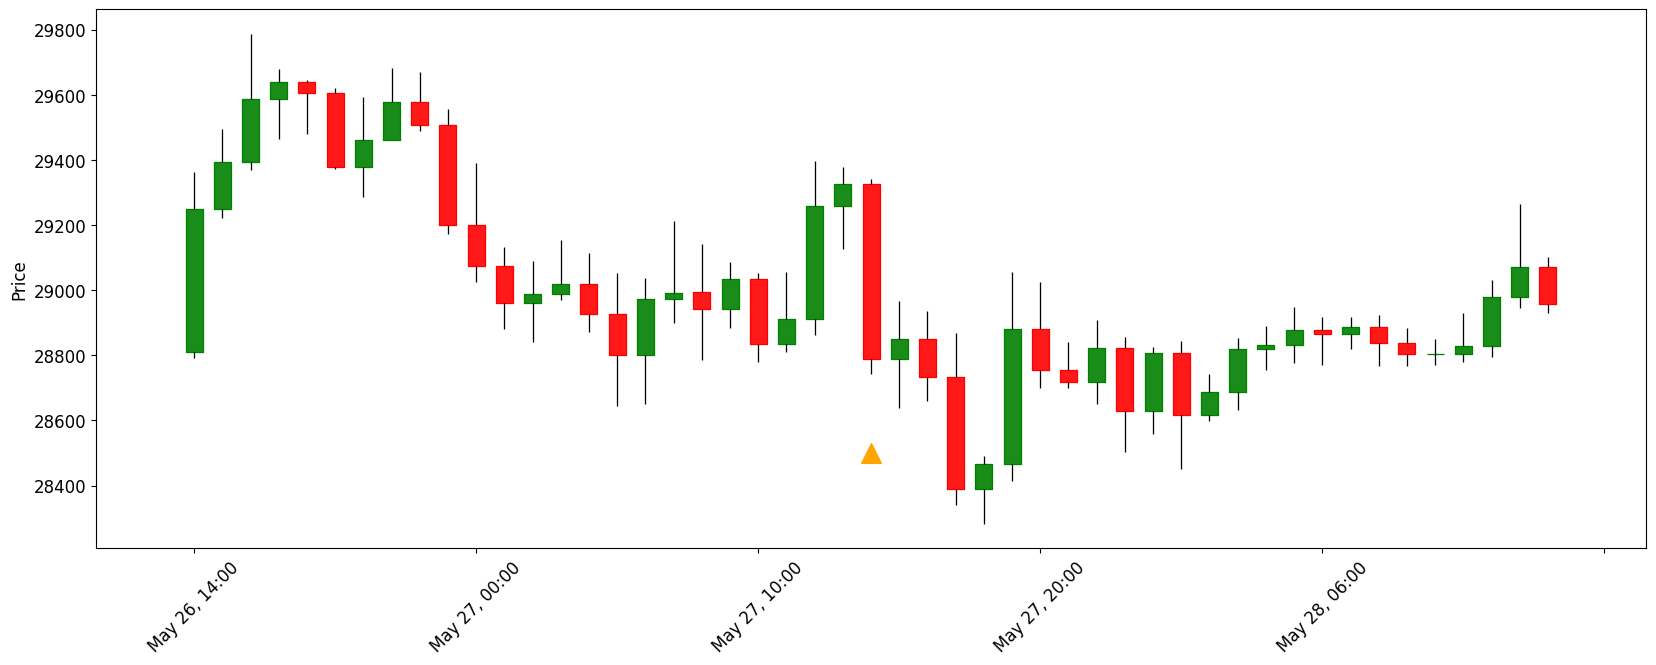

,open,high,low,close,volume,iloc,CDL3INSIDE,CDL3LINESTRIKE,CDLDOJI,CDLHAMMER,...,CDLBELTHOLD,CDLMARUBOZU,CDLENGULFING,CDLMORNINGSTAR,CDLEVENINGSTAR,CDLMORNINGDOJISTAR,CDLHANGINGMAN,CDLSHOOTINGSTAR,CDLEVENINGDOJISTAR,CDLSPINNINGTOP
date,,,,,,,,,,,,,,,,,,,,,
2022-04-21 14:00:00,42693.00,42708.27,42415.63,42498.41,2706.33571,40875,0,0,0,0,...,-100,0,0,0,-100,0,0,0,-100,0
2022-05-22 11:00:00,30187.84,30259.69,29800.00,29897.52,3807.36507,41616,0,0,0,0,...,0,0,0,0,-100,0,0,0,0,0
2022-05-25 15:00:00,29783.35,29828.40,29600.00,29629.36,2191.57829,41692,0,0,0,0,...,0,0,0,0,-100,0,0,0,0,0
2022-05-27 14:00:00,29324.72,29341.41,28742.92,28787.42,4033.05023,41739,0,100,0,0,...,-100,0,-100,0,-100,0,0,0,0,0
2022-07-23 06:00:00,22902.46,22935.97,22810.00,22827.46,3248.16883,43099,0,0,0,0,...,0,0,0,0,-100,0,0,0,-100,0


In [259]:
figure_data = []

# -- Hammer --
# dt = df.copy().loc[(df["CDLHAMMER"] == 100) & (df["close"] - df["open"] > 0)]
# dt = df.copy().loc[(df["CDLHAMMER"] == 100) & (df["close"] - df["open"] < 0)]
# dt = df.copy().loc[(df["CDLHAMMER"] == 100) & (df["close"] - df["open"] > 0) & (df["open"] <= df["close"].rolling(10).min())]
# dt = df.copy().loc[(df["CDLHAMMER"] == 100) & (df["close"] - df["open"] < 0) & (df["open"] >= df["close"].rolling(10).max())]
# dt = df.copy().loc[(df["CDLINVERTEDHAMMER"] == 100)& (df["close"] - df["open"] < 0)]
# dt = df.copy().loc[(df["CDLINVERTEDHAMMER"] == 100)& (df["close"] - df["open"] > 0)]

# -- Doji --
# dt = df.copy().loc[(df["CDLDOJI"] == 100)]
# dt = df.copy().loc[(df["CDLDOJI"] == 100) & (df["close"].shift(1) - df["open"].shift(1) > 0)]
# dt = df.copy().loc[(df["CDLDOJI"] == 100) & (df["close"].shift(1) - df["open"].shift(1) < 0)]
# dt = df.copy().loc[(df["CDLDOJI"] == 100) & (df["close"].shift(-1) - df["open"].shift(-1) > 0)]
# dt = df.copy().loc[(df["CDLDOJI"] == 100) & (df["close"].shift(-1) - df["open"].shift(-1) < 0)]

# -- 3 Inside --
# dt = df.copy().loc[(df["CDL3INSIDE"] == 100)]
# dt = df.copy().loc[(df["CDL3INSIDE"] == -100)]

# -- 3 Line Strike --
# dt = df.copy().loc[(df["CDL3LINESTRIKE"] == 100)]
# dt = df.copy().loc[(df["CDL3LINESTRIKE"] == -100)]

# -- Belt Hold --
# dt = df.copy().loc[(df["CDLBELTHOLD"] == 100)]
# dt = df.copy().loc[(df["CDLBELTHOLD"] == -100)]

# -- Marubozu --
# dt = df.copy().loc[(df["CDLMARUBOZU"] == 100)]
# dt = df.copy().loc[(df["CDLMARUBOZU"] == -100)]

# -- Engufling --
# dt = df.copy().loc[(df["CDLENGULFING"] == 100)]
# dt = df.copy().loc[(df["CDLENGULFING"] == -100)]

# -- Morning / Evening Star --
# dt = df.copy().loc[(df["CDLMORNINGSTAR"] == 100)]
dt = df.copy().loc[(df["CDLEVENINGSTAR"] == -100)]




shift = 0
for index, row in dt.iterrows():
    index_figure = int(row["iloc"])
    price_detected = df.iloc[index_figure+shift]["close"]
    figure_data.append({
        "index_figure": index_figure,
        "price_when_detected": price_detected,
        "diff_mean_close_1": (df.iloc[index_figure+1+shift:index_figure+2+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_3": (df.iloc[index_figure+1+shift:index_figure+4+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_5": (df.iloc[index_figure+1+shift:index_figure+6+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_10": (df.iloc[index_figure+1+shift:index_figure+11+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_20": (df.iloc[index_figure+1+shift:index_figure+21+shift]["close"].mean() - price_detected) / price_detected,
        "diff_mean_close_40": (df.iloc[index_figure+1+shift:index_figure+41+shift]["close"].mean() - price_detected) / price_detected,
    })

df_figure = pd.DataFrame(figure_data)
len_figure = len(df_figure)
print("---",len_figure,"Figure detected ---")
print("Average evolution after 1 periods:",round(df_figure["diff_mean_close_1"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_1"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 3 periods:",round(df_figure["diff_mean_close_3"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_3"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 5 periods:",round(df_figure["diff_mean_close_5"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_5"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 10 periods:",round(df_figure["diff_mean_close_10"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_10"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 20 periods:",round(df_figure["diff_mean_close_20"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_20"] > 0]) / len_figure,2),"% of data > 0")
print("Average evolution after 40 periods:",round(df_figure["diff_mean_close_40"].mean()*100,2),"% |", round(100 * len(df_figure.loc[df_figure["diff_mean_close_40"] > 0]) / len_figure,2),"% of data > 0")
plot_candle_pattern(df, int(dt.iloc[-2]["iloc"]), hours_multiplier=1, marker_zoom=0.01)
dt.iloc[-5:]

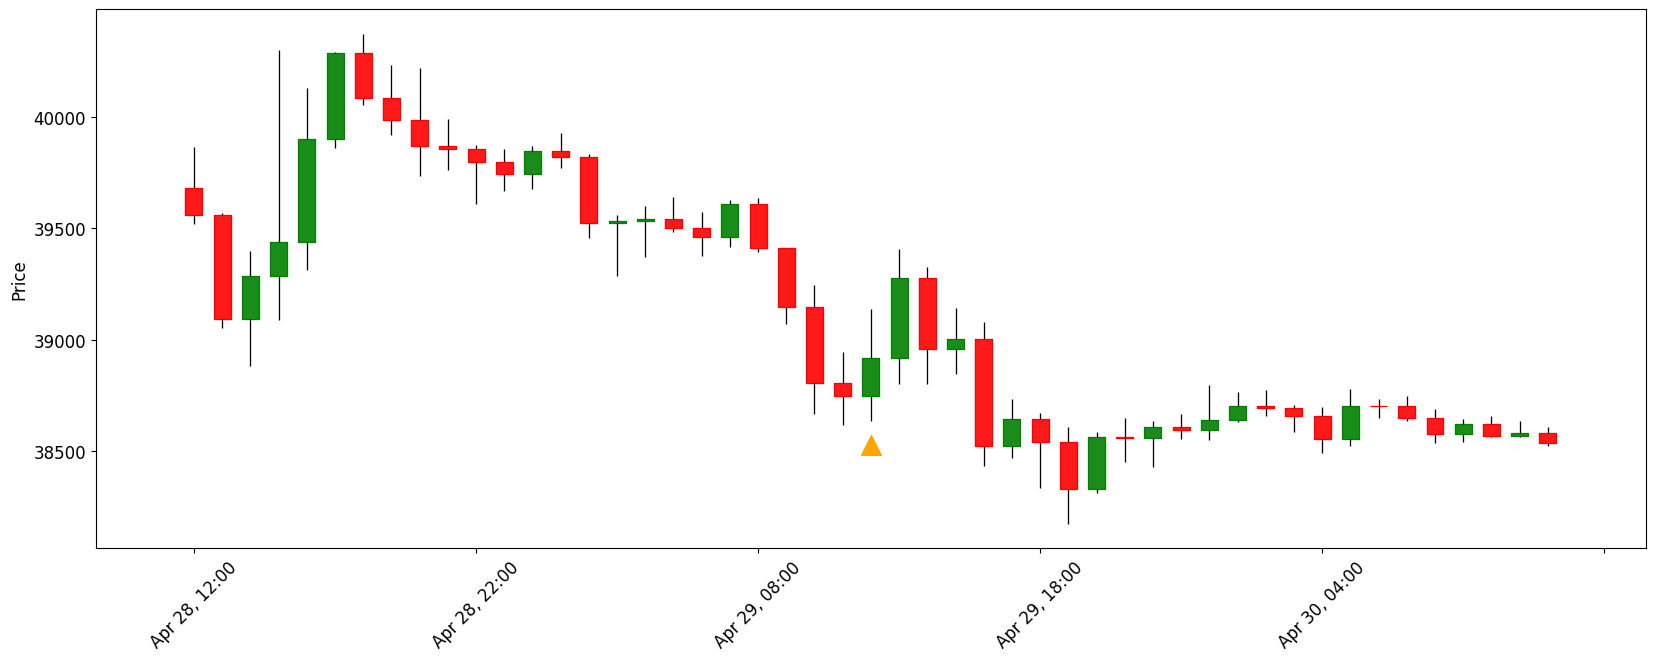

In [256]:
plot_candle_pattern(df, 41065, hours_multiplier=1, marker_zoom=0.01)